# Import libraries and set up the environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


## read the csv file

In [2]:
df = pd.read_csv(r"./data/California_Houses.csv")
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481100,654530.1863,830631.5430,248510.05820,222619.89040
20636,77100,2.5568,18,697,150,356,114,39.49,-121.21,160445.433500,659747.0684,836245.9152,246849.88890,218314.42460
20637,92300,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341200,654042.2140,830699.5732,240172.22050,212097.93620
20638,84700,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022200,657698.0077,834672.4619,238193.86590,207923.19920


<Axes: >

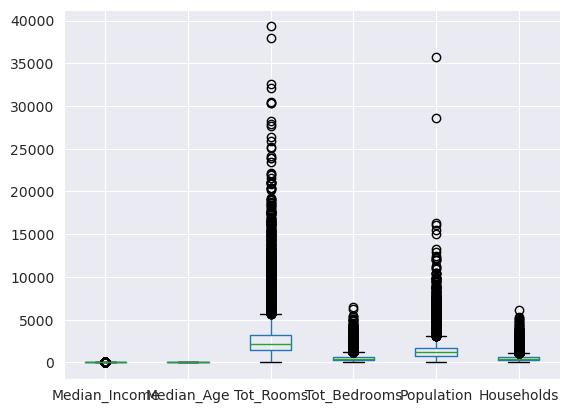

In [5]:
removed_cols = ['Distance_to_LA', 'Distance_to_SanJose', 'Distance_to_SanDiego', 'Distance_to_coast', 'Distance_to_SanFrancisco', 'Longitude', 'Latitude', 'Median_House_Value']

wanted_cols = [e for e in df.columns if e not in removed_cols]

df.boxplot(column=wanted_cols)

In [23]:
def mark_outliers(data:pd.DataFrame) -> pd.DataFrame:
    df1 = data.copy()
    
    for col in data.columns:    
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
    
        mx = Q3 + (1.5 * IQR)
        mn = Q1 - (1.5 * IQR)
        
        # counter +=  ((df1[col] < (Q1 - 1.5 * IQR)) | (df1[col] > (Q3 + 1.5 * IQR))).sum()
        df1.loc[df1[col] > mx, col] = np.nan
        df1.loc[df1[col] < mn, col] = np.nan
        
    return df1

no_outliers = mark_outliers(df)
for i in range(50):
    # before dropping
    print("outliers count: {}".format(no_outliers.isnull().sum().sum()))
    print("df length: {}".format(len(no_outliers)))
    
    # after dropping outliers
    no_outliers.dropna(inplace=True, how='any')
    print("outliers count: {}".format(no_outliers.isnull().sum().sum()))
    print("df length: {}".format(len(no_outliers)))
    print("---------------------------")
    no_outliers = mark_outliers(no_outliers)
    



outliers count: 9113
df length: 20640
outliers count: 0
df length: 15406
---------------------------
outliers count: 2580
df length: 15406
outliers count: 0
df length: 13236
---------------------------
outliers count: 1051
df length: 13236
outliers count: 0
df length: 12276
---------------------------
outliers count: 435
df length: 12276
outliers count: 0
df length: 11862
---------------------------
outliers count: 192
df length: 11862
outliers count: 0
df length: 11676
---------------------------
outliers count: 64
df length: 11676
outliers count: 0
df length: 11613
---------------------------
outliers count: 44
df length: 11613
outliers count: 0
df length: 11569
---------------------------
outliers count: 22
df length: 11569
outliers count: 0
df length: 11547
---------------------------
outliers count: 7
df length: 11547
outliers count: 0
df length: 11540
---------------------------
outliers count: 1
df length: 11540
outliers count: 0
df length: 11539
---------------------------
outl

<Axes: >

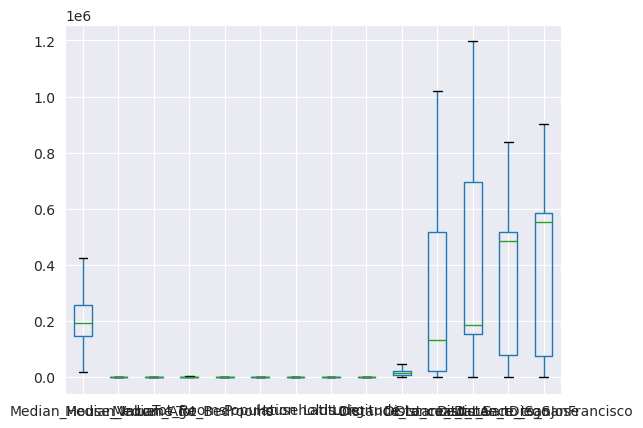

In [24]:
removed_cols = ['Distance_to_LA', 'Distance_to_SanJose', 'Distance_to_SanDiego', 'Distance_to_coast', 'Distance_to_SanFrancisco', 'Longitude', 'Latitude', 'Median_House_Value']

wanted_cols = [e for e in df.columns if e not in removed_cols]
no_outliers.boxplot()

/home/hp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


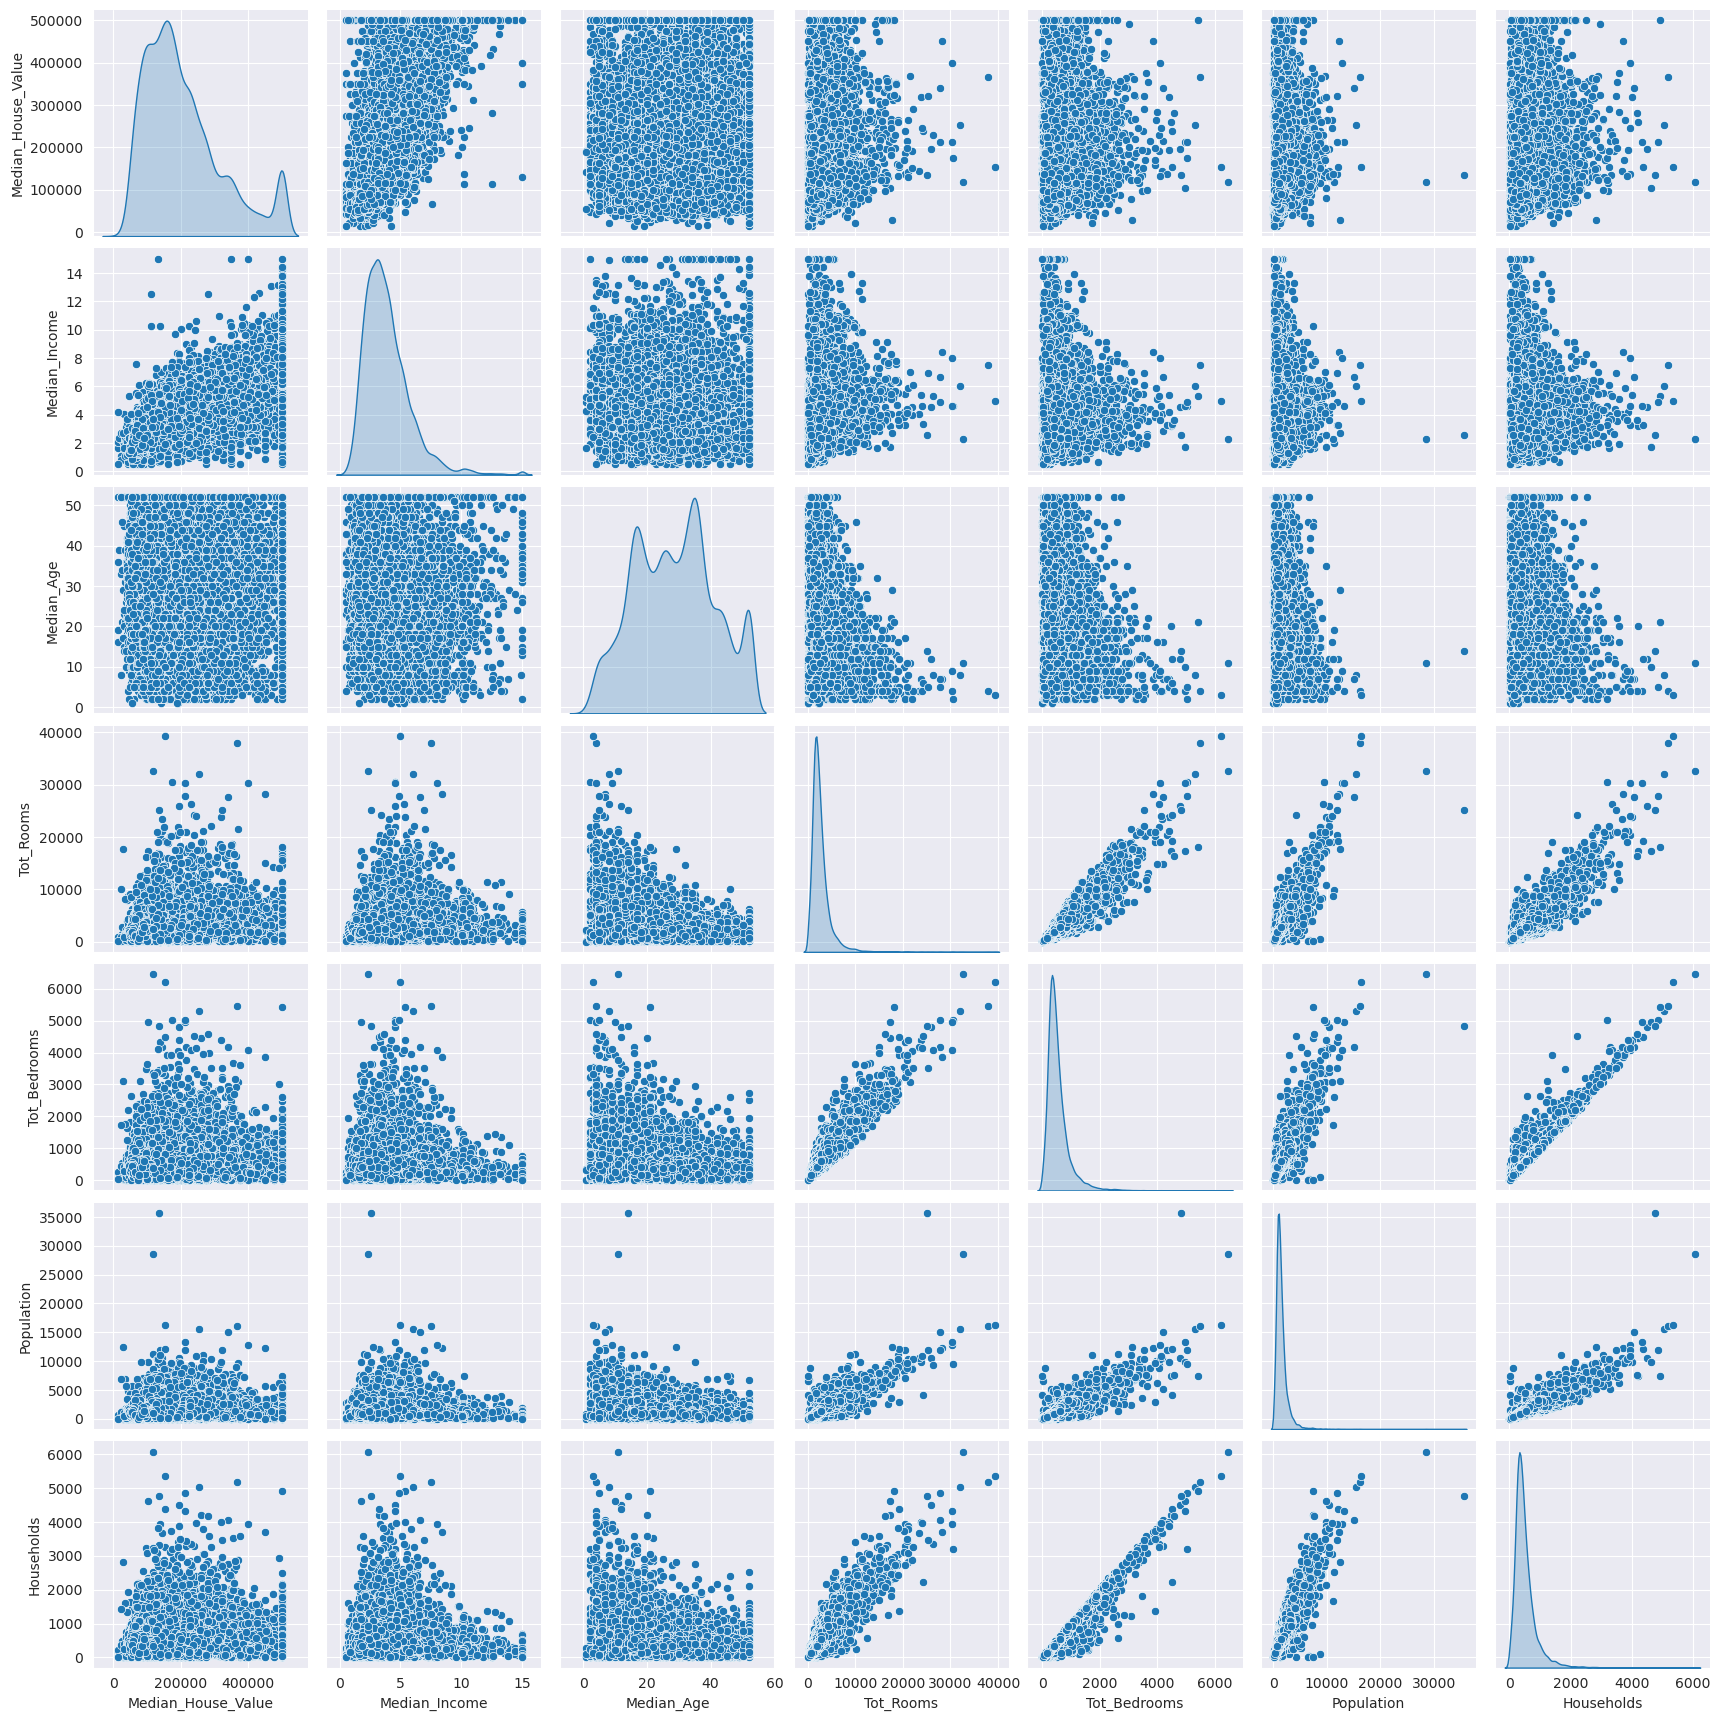

In [8]:
removed_cols = ['Distance_to_LA', 'Distance_to_SanJose', 'Distance_to_SanDiego', 'Distance_to_coast', 'Distance_to_SanFrancisco', 'Longitude', 'Latitude']
sns.pairplot(data=df.drop(removed_cols, axis = 1, inplace=False), diag_kind='kde')

## Data splitting

In [25]:
y = no_outliers['Median_House_Value']
x = no_outliers.drop(['Median_House_Value'], axis=1)
x

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
2,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
5,4.0368,52.0,919.0,213.0,413.0,193.0,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
6,3.6591,52.0,2535.0,489.0,1094.0,514.0,37.84,-122.25,6843.020847,554364.4069,733249.8086,64315.99174,17538.20997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,3.0000,43.0,1485.0,270.0,653.0,251.0,38.44,-121.56,40006.515990,571285.6424,750366.7616,126246.07920,106283.18390
20526,4.0370,37.0,1365.0,276.0,952.0,268.0,38.38,-121.61,32949.644120,568029.8342,747221.2821,118773.30470,98533.54160
20570,3.2222,6.0,1485.0,318.0,894.0,308.0,38.54,-121.96,46726.769480,599817.4816,779164.0266,134065.21190,94622.25900
20572,2.7989,27.0,3044.0,565.0,1583.0,514.0,38.52,-121.98,44313.159850,598992.3099,778356.3732,131933.30480,91863.13847


In [26]:
#split the data 70:30
x_train, x_validationAndTest, y_train, y_validationAndTest = train_test_split(x, y, train_size=0.7)

#split the 30 50:50
x_validation, x_test, y_validation, y_test = train_test_split(x_validationAndTest, y_validationAndTest, train_size=0.5)

print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


### Data scaling

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.transform(x_validation)
x_test = scaler.transform(x_test)

-------------------
## Model interpretation
* model score: the higher, the better
* MSE: the closer to zero the more accurate the prediction is
* MAE: same as MSE, closer to zero means more accurate model

----------------
## helpful resources
- [here](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
- [here](https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604)
- [linear regression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

----------------

## linear regression

In [28]:
LR = LinearRegression()
LR.fit(x_train, y_train)

linear_prediction = LR.predict(x_validation)
print("score: {}".format(LR.score(x_validation, y_validation)))
print("MSE: {}".format(metrics.mean_squared_error(y_validation, linear_prediction)))
print("MAE: {}".format(metrics.mean_absolute_error(y_validation, linear_prediction)))

score: 0.5434966564204653
MSE: 3078021724.9486494
MAE: 42053.901877269425


## lasso regression

In [29]:
lasso = Lasso(max_iter=200)
lasso.fit(x_train, y_train)

lasso_prediction = lasso.predict(x_validation)
print("score: {}".format(lasso.score(x_validation, y_validation)))
print("MSE: {}".format(metrics.mean_squared_error(y_validation, lasso_prediction)))
print("MAE: {}".format(metrics.mean_absolute_error(y_validation, lasso_prediction)))

score: 0.5412798245240784
MSE: 3092968946.7677355
MAE: 42256.81114541588


/home/hp/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+13, tolerance: 5.373e+09
  model = cd_fast.enet_coordinate_descent(


## Ridge regression

In [30]:
ridge = Ridge()
ridge.fit(x_train, y_train)

ridge_prediction = ridge.predict(x_validation)
print("score: {}".format(ridge.score(x_validation, y_validation)))
print("MSE: {}".format(metrics.mean_squared_error(y_validation, ridge_prediction)))
print("MAE: {}".format(metrics.mean_absolute_error(y_validation, ridge_prediction)))

score: 0.5435016828230306
MSE: 3077987833.901603
MAE: 42062.77301516392


Text(0, 0.5, 'predicted Y')

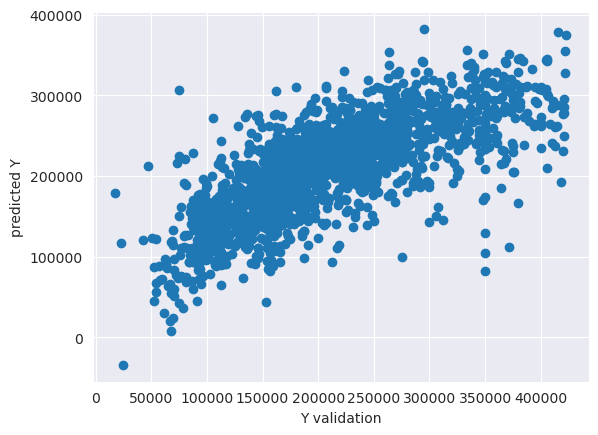

In [31]:
plt.scatter(y_validation, ridge_prediction)
plt.xlabel('Y validation')
plt.ylabel('predicted Y')

## Report